# Tarea Extra Física Computacional
Nombre: Ana Belen Sanvicente Méndez

In [ ]:
from pylab import * 
import numpy as np
from scipy.integrate import *

## Problema 1.  Se tiene una pelota de masa m sobre un plano inclinado a un ángulo α = 15◦, 30◦ y 45◦.




(a) Dibuje la trayectoria de la pelota si es lanzada desde el plano inclinado con una velocidad v0x, v0y >
0 considerando que hay fricción con el aire proporcional a la velocidad.

Solución analítica inciso (a) para la obtención de la ecuaciones de la posición:

$$F_{Total}= F+F_r$$
$$ F_r = -mλv$$
$$ F = ma$$

Entonces,
$$ m \frac{dv_x}{dt} = -mλv_x$$

$$ m \frac{dv_y}{dt} = -mg-mλv_y$$

Resolviendo y usando la ecuaciones iniciales para t = 0, $v_x = v_{0x}, v_y = v_{0y}$ Donde $v_{0x} = v_0 cos(α)$ y $v_{0y} = v_0 sen(α)$

$$\frac{dx}{dt} = v_{0x} exp(-λt)$$

$$\frac{dx}{dt} = (\frac{g}{λ} + v_{0y})  exp(-λt) - \frac{g}{λ}$$

Obteniendo x e y, con $ x_0 = 0$ e $y_0 = 0$

$$x= \frac{v_{0x}}{b}(1-exp(-bt))$$
$$y= \frac{1}{b} (\frac{g}{b}+v_{0y})(1-exp(-bt))-\frac{g}{b}t$$

Descripción gráfica del fenómeno:

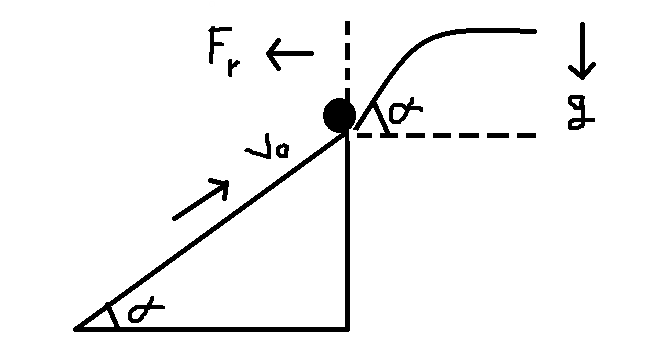

In [ ]:
# Solución inciso (a)
t = linspace(0,20,1000) # tiempo
g = 9.8  # Gravedad
λ = 0.1  # Coeficiente de fricción
alfa1 , alfa2 , alfa3 = 15 ,  30 , 45  # 	Ángulos de inclinación
v_0 = 60  # Velocidad inicial > 0

# Para alfa = 15◦
v_0x1 = v_0*cos(alfa1) # Cálculo de la velocidad inical para el eje x > 0
v_0y1 = v_0*sin(alfa1) # Cálculo de la velocidad inical para el eje y > 0
x1 = (v_0x1/λ) * (1-exp(-λ*t)) # Se realiza la suma de x_0 para ajustarlo al eje
y1 = (1/λ)*((g/λ)+v_0y1) * (1-exp(-λ*t)) - (g/λ)*t # Se realiza la suma de y_0 o altura del plano inclinado para ajustarlo al eje


# Para alfa = 30◦
v_0x2 = v_0*cos(alfa2) # Cálculo de la velocidad inical para el eje x > 0
v_0y2 = v_0*sin(alfa2) # Cálculo de la velocidad inical para el eje y > 0

x2 = (v_0x2/λ) * (1-exp(-λ*t)) # Se realiza la suma de x_0 para ajustarlo al eje
y2 = (1/λ)*((g/λ)+v_0y2) * (1-exp(-λ*t)) - (g/λ)*t # Se realiza la suma de y_0 o altura del plano inclinado para ajustarlo al eje\


# Para alfa = 45◦
v_0x3 = v_0*cos(alfa3) # Cálculo de la velocidad inical para el eje x > 0
v_0y3 = v_0*sin(alfa3) # Cálculo de la velocidad inical para el eje y > 0

x3 = (v_0x3/λ) * (1-exp(-λ*t)) # Se realiza la suma de x_0 para ajustarlo al eje
y3 = (1/λ)*((g/λ)+v_0y3) * (1-exp(-λ*t)) - (g/λ)*t # Se realiza la suma de y_0 o altura del plano inclinado para ajustarlo al eje

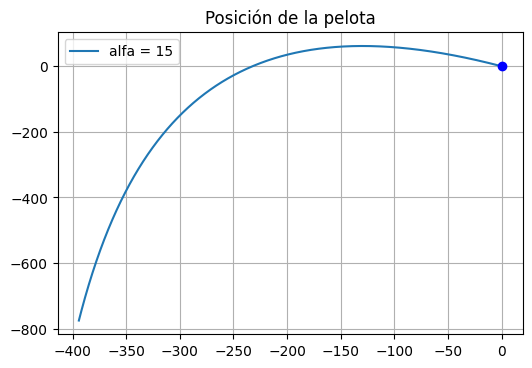

In [ ]:
figure(dpi=100)
plot(x1,y1, label = 'alfa = 15')
title('Posición de la pelota')
plot([0],[0],'bo')
grid()
legend()

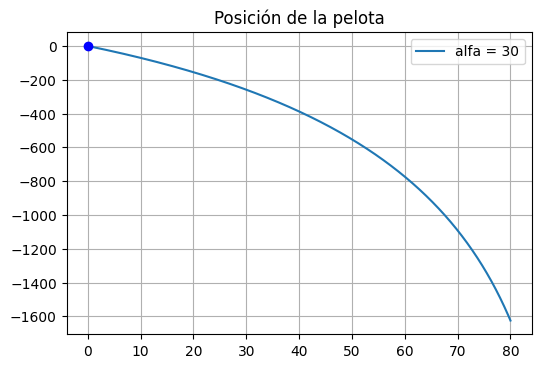

In [ ]:
figure(dpi=100)
plot(x2,y2, label = 'alfa = 30')
title('Posición de la pelota')
plot([0],[0],'bo')
grid()
legend()

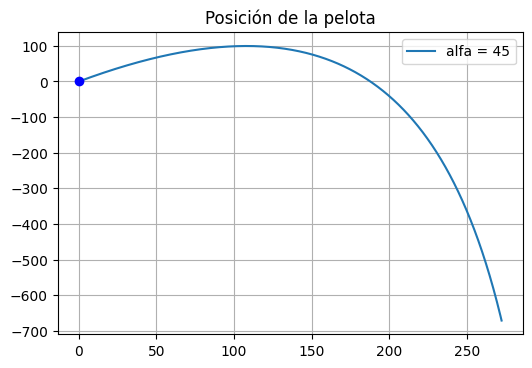

In [ ]:
figure(dpi=100)
plot(x3,y3, label = 'alfa = 45')
title('Posición de la pelota')
plot([0],[0],'bo')
grid()
legend()

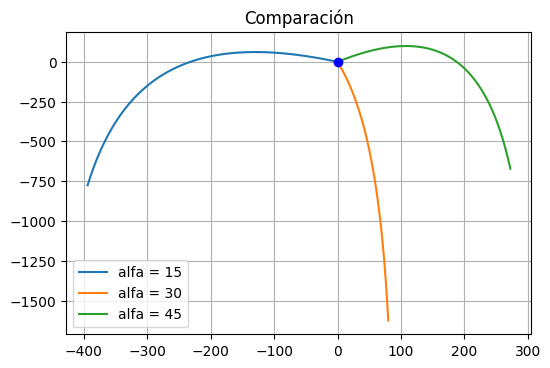

In [ ]:
figure(dpi=100)
plot(x1,y1, label = 'alfa = 15')
plot(x2,y2, label = 'alfa = 30')
plot(x3,y3, label = 'alfa = 45')
plot([0],[0],'bo')
title('Comparación')
grid()
legend()

(b) Realice la misma simulación si ahora la fricción es proporcional al cuadrado de la velocidad.

Solución analítica inciso (b) para la obtención de la ecuaciones de la posición:
 $$ m \frac{dv_x}{dt} = -mλv_x (v_x^2+v_y^2)^{\frac{1}{2}}$$

$$ m \frac{dv_y}{dt} = -mg-mλv_y (v_x^2+v_y^2)^{\frac{1}{2}}$$

Luego, se utiliza Runge Kutta y tomamos m=1


In [ ]:
def RK4(f, t_intervalo,y0,delta= 0.01):
    t = arange(t_intervalo[0],t_intervalo[1]+delta,delta)
    sol = zeros((len(y0),len(t)))
    sol[:,0] = y0
    for i in range(len(t)-1):
        k1 = f(t[i],sol[:,i])
        k2 = f(t[i] + 0.5*delta,sol[:,i] + 0.5*delta*k1)
        k3 = f(t[i] + 0.5*delta,sol[:,i] + 0.5*delta*k2)
        k4 = f(t[i] + delta,sol[:,i] + delta*k3)
        sol[:,i+1] = sol[:,i] + (delta/6)*(k1 + 2*k2+2*k3+k4)
    return (t,sol)
def mov(t,x):
    dx = x[2]
    dy = x[3]
    dvx = -0.1*x[0]*sqrt(x[0]**2+x[1]**2)
    dvy = -9.8-0.1*x[1]*sqrt(x[0]**2+x[1]**2)
    return array((dx,dy,dvx,dvy))

In [ ]:
# Solución inciso (b)
v_0 = 50
ci = (v_0*cos(alfa1),0,0,v_0*sin(alfa1))
solucion = RK4(mov,(0,5), ci)

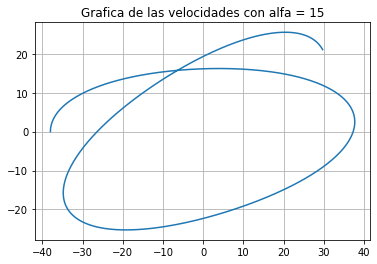

In [ ]:
plot(solucion[1][0],solucion[1][1])
title('Grafica de las velocidades con alfa = 15')
grid()

In [ ]:
v_0 = 50
ci = (v_0*cos(alfa2),0,0,v_0*sin(alfa1))
solucion2 = RK4(mov,(0,5), ci)

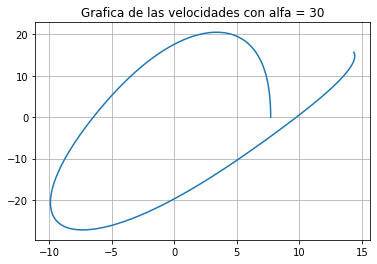

In [ ]:
plot(solucion2[1][0],solucion2[1][1])
title('Grafica de las velocidades con alfa = 30')
grid()

In [ ]:
v_0 = 50
ci = (v_0*cos(alfa3),0,0,v_0*sin(alfa3))
solucion3 = RK4(mov,(0,5), ci)

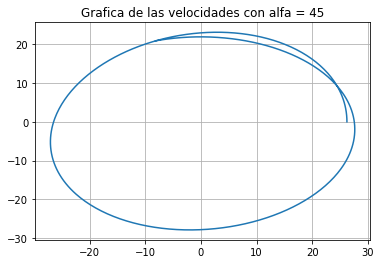

In [ ]:
plot(solucion3[1][0],solucion3[1][1])
title('Grafica de las velocidades con alfa = 45')
grid()

In [ ]:
# Se debe integrar nuevamente para encontrar la solución, me habia planteado usar runge kutta dos veces pero los tipos no coincidian :( y cambiando las condiciones iniciales a (0,0,0,0)

(c) ¿Qué sucede si ahora la pelota es lanzada con velocidad inicial $v_{0x} < 0 $ tal que $ tan^{−1} (\frac{v0y}{v0x})> α$

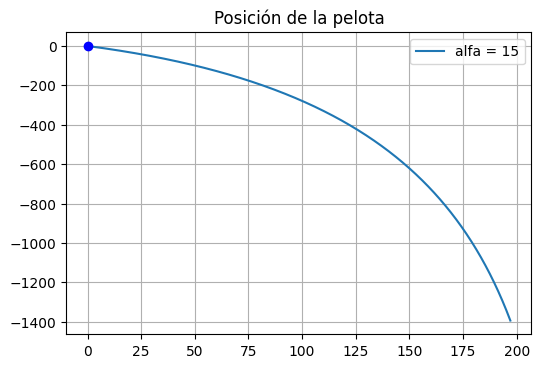

In [ ]:
# Tomemos un valor de v_0y fijo y uno de v_0x que cumpla con esa condición
# Solución inciso (a)
t = linspace(0,20,1000) # tiempo
g = 9.8  # Gravedad
λ = 0.1  # Coeficiente de fricción
alfa1 , alfa2 , alfa3 = 15 ,  30 , 45  # 	Ángulos de inclinación

# Para alfa = 15◦
v_0x =-30*cos(alfa1) # Cálculo de la velocidad inical para el eje x > 0
v_0y = -50*sin(alfa1) # Cálculo de la velocidad inical para el eje y > 0
x = (v_0x/λ) * (1-exp(-λ*t)) # Se realiza la suma de x_0 para ajustarlo al eje
y = (1/λ)*((g/λ)+v_0y) * (1-exp(-λ*t)) - (g/λ)*t # Se realiza la suma de y_0 o altura del plano inclinado para ajustarlo al eje
figure(dpi=100)
plot(x,y, label = 'alfa = 15')
title('Posición de la pelota')
plot([0],[0],'bo')
grid()
legend()


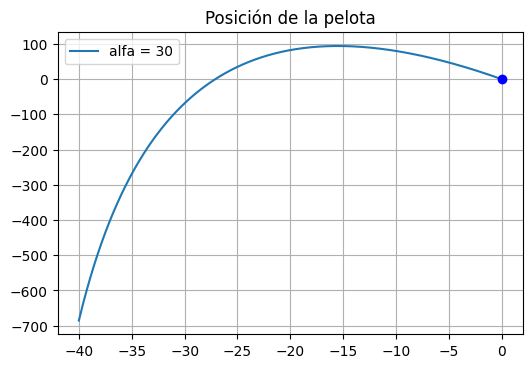

In [ ]:
# Para alfa = 30◦
v_0x2 =-30*cos(alfa2) # Cálculo de la velocidad inical para el eje x > 0
v_0y2 = -50*sin(alfa2) # Cálculo de la velocidad inical para el eje y > 0

x2 = (v_0x2/λ) * (1-exp(-λ*t)) # Se realiza la suma de x_0 para ajustarlo al eje
y2 = (1/λ)*((g/λ)+v_0y2) * (1-exp(-λ*t)) - (g/λ)*t # Se realiza la suma de y_0 o altura del plano inclinado para ajustarlo al eje\
figure(dpi=100)
plot(x2,y2, label = 'alfa = 30')
title('Posición de la pelota')
plot([0],[0],'bo')
grid()
legend()

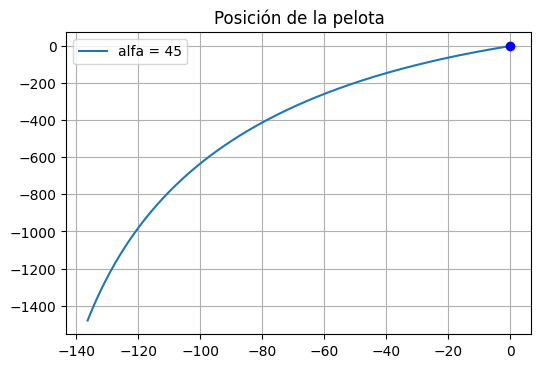

In [ ]:
# Para alfa = 45◦
v_0x3 = -30*cos(alfa3) # Cálculo de la velocidad inical para el eje x > 0
v_0y3 = -50*sin(alfa3) # Cálculo de la velocidad inical para el eje y > 0

x3 = (v_0x3/λ) * (1-exp(-λ*t)) # Se realiza la suma de x_0 para ajustarlo al eje
y3 = (1/λ)*((g/λ)+v_0y3) * (1-exp(-λ*t)) - (g/λ)*t # Se realiza la suma de y_0 o altura del plano inclinado para ajustarlo al eje
figure(dpi=100)
plot(x3,y3, label = 'alfa = 45')
title('Posición de la pelota')
plot([0],[0],'bo')
grid()
legend()

In [ ]:
# Vemos que el comportamiento se invierte para los tres casos y la fricción supera a la fuerza con que es lanzada en los últimos dos casos y en el primer caso esta sí supera a la fricción cosa que no pasaba en el inciso (a).

## Problema 2. 
Considere la ecuacion de Fourier en 2-D en un circulo de $R = 1$. Considere que la temperatura en la orilla es nula y que se tiene una fuente de calor. De esta manera la ecuacion de calor es:
$$\frac{∂u}
{∂t} = D∇2u + q $$(1)
donde D =0.5, q es un termino fuente que tienen la forma $q(r, t) = χ(0.25,0.5)(r) sin(3t)$, donde
$χ(0.25,0.5)(r)$ es una funcion que es 1 para $r ∈ [0.25, 0.5]$ y 0 para los demas puntos. Encuentre
una solucion numerica para $t ∈ [0, 30]$ y realice diferentes graficas a distintos tiempos que muestren el
comportamiento numerico de la solucion de la parte radial.


Para la solucion de este problema se divide la solucion en dos partes: una homogenea y otra no homogenea. Para la parte homogenea se utiliza a Laplace y no se involucra a q. Y se resuelve por el metodo de diferencias finitas.
$$
\Delta t = \frac{1}{2D}\frac{(\Delta x + \Delta y )^2}{(\Delta x)^2 + (\Delta y)^2}
$$

In [ ]:
# Solución
D = 0.5
w = h = 6
dx = dy = 0.1
T_frio, T_caliente = 100, 700 # Intervalo de temperatura
nx, ny = int(w/dx), int(h/dy)
dx2, dy2 = dx*dx, dy*dy
dt = (dx ** 2)/(4 * D) # Cambio del tiempo
u_0 = T_frio * np.ones((nx, ny))
u = u_0.copy()
r, cx, cy = 1, 3, 3
r2 = r**2

for i in range(nx):
    for j in range(ny):
        p2 = (i*dx-cx)**2 + (j*dy-cy)**2
        if p2 < r2:
            u_0[i,j] = T_caliente    
def ec_homogenea_calor2D(u_0, u):
    u[1:-1, 1:-1] = u_0[1:-1, 1:-1] + D * dt * ((u_0[2:, 1:-1] - 2*u_0[1:-1, 1:-1] + u_0[:-2, 1:-1])/dx2
          + (u_0[1:-1, 2:] - 2*u_0[1:-1, 1:-1] + u_0[1:-1, :-2])/dy2 )
    u_0 = u.copy()
    return u_0, u


<Figure size 1500x1000 with 0 Axes>

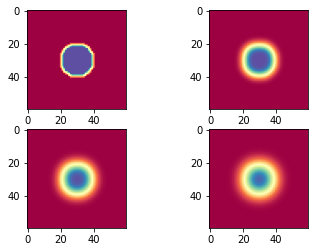

In [ ]:
figure(dpi=250)
n = 100
mfig = [0, 10, 20, 30]
fign = 0
fig = plt.figure()
for m in range(n):
    u_0, u = ec_homogenea_calor2D(u_0, u)
    if m in mfig:
        fign += 1
        ax = fig.add_subplot(220 + fign)
        im = ax.imshow(u.copy(), cmap=plt.get_cmap('Spectral'), vmin= T_frio,vmax = T_caliente)
plt.show()
# Se aprecian los cambios en el tiempo 0, 50, 100 y 150 seg.
# La escala de colores son las temperaturas en Kelvin